# Опис проекту

**K-means** - це алгоритм, який групує точки даних у $k$ кластерів, де кожен кластер представлений центроїдом (центральною точкою). Алгорит намагається мінімізувати відстань між точками і їхніми відповідними центроїдами.
Це один з основних алгоритмів машинного навчання для кластеризації, який використовується для групування схожих точок даних у кластери.

# Імпорт бібліотек



In [1]:
import numpy as np
import matplotlib.pyplot as plt

* `NumPy` - для обчислень та роботи з масивами
* `Matplotlib` - для візуалізації результатів кластеризації

# Створення випадкового набору даних

Буде створено набір випадкових двовимірних точок

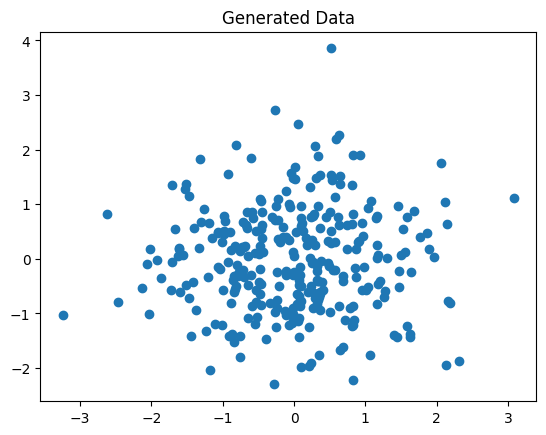

In [8]:
# генерація випадкових даних
np.random.seed(42)
data = np.random.randn(300, 2)

# зміщення до даних для створення кількох кластерів
# data[:100] += np.array([5, 5])
# data[100:200] += np.array([-5, -5])

plt.scatter(data[:, 0], data[:, 1])
plt.title("Generated Data")
plt.show()

* `np.random.seed()` встановлює початкове значення для генератора випадкових чисел, щоб результати були відтворюваними
* `data` - генерує 300 випадкових двовимірних точок, з яких 100 зміщені до одного кластера, а інші 100 - до іншого

# Ініціалізація центроїдів

Випадково буде обрано $k$ точок із набору даних, як початкові центроїди

In [9]:
k = 3 # кількість кластерів

# випадковий вибір початкових центроїдів
centroids = data[np.random.choice(data.shape[0], k, replace=False)]
print("Initial Centroids:\n", centroids)

Initial Centroids:
 [[-1.1913035   0.65655361]
 [-0.54438272  0.11092259]
 [ 0.12029563  0.51443883]]


* `k` визначає кількість кластерів
* `centroids` - випадково обрані $k$ точок з набору даних як початкові центроїди

# Призначення кожної точки до найближчого центроїда

На кожній ітерації алгоритму кожну точку буде призначено до найближчого центроїда

In [10]:
def assign_clusters(data, centroids):
  # обчислення відстані від кожної точки до кожного центроїда
  distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
  # призначення точки до найближчого центроїда
  return np.argmin(distances, axis=0)

clusters = assign_clusters(data, centroids)
print("Clusters assignments:\n", clusters)

Clusters assignments:
 [2 2 1 2 1 1 1 0 0 1 2 1 1 0 1 0 1 2 1 0 2 1 1 2 1 2 0 2 1 2 1 1 2 2 1 2 2
 0 1 1 2 2 1 2 1 2 1 1 2 1 1 1 2 2 2 0 2 2 1 2 2 2 2 1 1 0 0 0 1 2 2 0 2 1
 2 2 1 1 2 0 0 2 2 2 1 1 2 2 2 2 2 0 2 2 1 2 1 2 1 1 2 2 1 2 2 2 2 2 1 1 2
 1 2 1 0 1 1 2 0 0 1 2 1 1 2 0 2 1 2 2 1 0 1 2 1 2 2 0 1 1 2 2 2 2 1 1 0 1
 2 2 1 2 2 2 2 2 2 2 2 2 2 0 1 2 2 1 1 2 1 2 1 1 1 1 1 2 2 1 1 1 2 2 2 2 1
 2 2 2 2 2 1 0 1 2 2 0 0 2 0 2 1 2 1 1 2 2 0 1 2 2 2 2 2 0 2 1 2 2 2 0 2 0
 0 1 1 2 0 1 1 1 2 1 1 2 1 1 0 2 2 2 1 0 1 1 2 2 1 2 1 1 2 0 1 1 1 2 1 0 1
 2 0 1 1 0 1 1 1 1 1 2 2 2 0 2 2 2 2 2 1 2 2 2 2 1 0 2 2 1 2 0 2 2 2 1 2 1
 2 2 1 1]


* `distances` обчислює відстаеь від кожної точки до всіх центроїдів за допомогою Евклідової відстані
* `np.argmin(distances, axis=0)` - визначає індекс найближчого центроїда для кожної точки

# Оновленя центроїдів

Після того, як кожна точка призначена до кластера, треба оновити позиції центроїдів, обчислюючи середнє значення для кожного кластера

In [11]:
def update_centroids(data, clusters, k):
  new_centroids = np.array([data[clusters == i].mean(axis=0) for i in range(k)])
  return new_centroids

new_centroids = update_centroids(data, clusters, k)
print("Updated Centroids:\n", new_centroids)

Updated Centroids:
 [[-1.39369015  0.53386935]
 [-0.41229382 -0.69537344]
 [ 0.70268205  0.35364424]]


* `update_centroids` - для кожного кластера (визначеного за допомогою `clusters`) обчислюється новий центроїд, як середнє значення точок, що належать до цього кластера

# Повторення алгоритму до збіжності

Попередні два кроки будуть повторюватись, доки центроїди не перестануть змінюватись, тобто алгоритм зійдеться

In [12]:
def kmeans(data, k, max_iters=100, tol=1e-4):
  centroids = data[np.random.choice(data.shape[0], k, replace=False)]

  for _ in range(max_iters):
    clusters = assign_clusters(data, centroids)
    new_centroids = update_centroids(data, clusters, k)

    # перевірка на збіжність
    if np.all(np.abs(new_centroids - centroids) < tol):
      break

    centroids = new_centroids

  return centroids, clusters

final_centroids, final_clusters = kmeans(data, k)
final_centroids, final_clusters

(array([[ 0.96837657, -0.26564195],
        [-0.72096495, -0.70349323],
        [-0.30095095,  0.96156726]]),
 array([0, 2, 1, 0, 2, 1, 1, 1, 2, 1, 0, 1, 1, 2, 1, 2, 1, 0, 1, 1, 0, 1,
        1, 2, 1, 0, 2, 0, 1, 2, 1, 1, 2, 2, 0, 2, 2, 2, 0, 1, 2, 0, 1, 0,
        2, 2, 1, 1, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 1, 0, 0, 0, 2, 1, 1, 1,
        2, 2, 1, 0, 2, 1, 2, 1, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 1, 1, 2, 2,
        2, 2, 0, 2, 2, 0, 1, 2, 1, 2, 1, 1, 2, 0, 1, 0, 2, 2, 0, 2, 1, 1,
        0, 0, 2, 1, 2, 2, 1, 0, 1, 2, 1, 2, 1, 1, 0, 2, 0, 1, 0, 2, 1, 1,
        1, 0, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 0, 1, 0, 2, 0,
        0, 2, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 0, 2, 0, 2, 1, 1, 2,
        0, 1, 1, 0, 2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 1, 1, 1, 2, 0, 2, 2, 0,
        2, 2, 1, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 1, 2, 0, 0, 1,
        0, 1, 2, 0, 1, 2, 2, 1, 1, 1, 0, 2, 1, 2, 1, 1, 2, 0, 0, 0, 1, 1,
        1, 1, 0, 2, 1, 0, 1, 1, 2, 2, 1, 1, 1, 0, 1, 2, 0, 2, 2, 2, 1, 1,
  

* `max_iter` - максимальна кількість ітерацій, щоб уникнути нескінченного циклу, якщо алгоритм не сходиться
* `tol` - допустима похибка, що визначає збіжність алгоритму
* `np.all(np.abs(new_centroids - centroids) < tol)` - перевіряє, чи змінились центроїди на достатньо мале значення (менше за `tol`), що означає збіжність

# Візуалізація результатів

Тепер можна відобразити точки даних та центроїди

In [ ]:
plt.scatter(data[:, 0], data[:, 1], c=final_clusters, cmap='viridis')
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], s=300, c='red', marker='X')
plt.title("K-means Clustering")
plt.show()

* `c=final_clusters` - кожній точці присвоюється колір залежно від її кластера
* `final_centroids` - центроїди відображаються великими червоними хрестиками

# Підсумок

Було реалізовано алгоритм **k-means** кластеризації з нуля за допомогою NumPy.
1. Було ініціалізовано випадкові центроїди
2. Було призначено кожну точку даних до найближчого центроїда
3. Було оновлено центроїди на основі призначених точок
4. Цей процес було повторено, доки центроїди не перестали змінюватись (алгоритм не зійшовся)

Результатом є розбиття точок на $k$ кластерів, кожен з яких має свій центроїд. Це основний метод, який лежить в основі багатьох алгоритмів кластеризації та є основою багатьох складніших моделей машинного навчання